<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-DataFrames-from-pickle" data-toc-modified-id="Reading-DataFrames-from-pickle-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading DataFrames from pickle</a></span></li><li><span><a href="#Featuring" data-toc-modified-id="Featuring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Featuring</a></span><ul class="toc-item"><li><span><a href="#OneHotEncoder" data-toc-modified-id="OneHotEncoder-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>OneHotEncoder</a></span></li><li><span><a href="#Date-treatment" data-toc-modified-id="Date-treatment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Date treatment</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train-Test split</a></span></li><li><span><a href="#Scaler" data-toc-modified-id="Scaler-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Scaler</a></span></li></ul></li><li><span><a href="#Models-for-percentaje-renovable-generation" data-toc-modified-id="Models-for-percentaje-renovable-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models for percentaje renovable generation</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#K-Neighbors" data-toc-modified-id="K-Neighbors-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-Neighbors</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Boosting-Models" data-toc-modified-id="Boosting-Models-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Boosting Models</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation-for-percentaje-renovable-generation" data-toc-modified-id="Evaluation-for-percentaje-renovable-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation for percentaje renovable generation</a></span><ul class="toc-item"><li><span><a href="#Model-choice" data-toc-modified-id="Model-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model choice</a></span></li><li><span><a href="#Real-vs-prediction-comparation" data-toc-modified-id="Real-vs-prediction-comparation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Real vs prediction comparation</a></span></li></ul></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Pipeline</a></span><ul class="toc-item"><li><span><a href="#Overfitting" data-toc-modified-id="Overfitting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Overfitting</a></span></li></ul></li></ul></div>

In [1]:
#import libraries
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from utils import date_transform,evaluation_function,plot_metrics,plot_real_vs_pred,train_test_val_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#set options
pd.options.display.max_columns=None
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_style("ticks")

#set  paths
path_model='../models/'
path_Data='../Data/'

# Reading DataFrames from pickle

Read the weather and ree data procesed at notebook "2-TFM Analysis and preprocesing" in pickle format

In [2]:
df_ree_weather=pd.read_pickle(path_Data+"Wheater_ree.pkl")

In [3]:
df_ree_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 0 to 7547
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      7548 non-null   object 
 1   system                     7548 non-null   object 
 2   Holiday                    7548 non-null   int32  
 3   weekday                    7548 non-null   int32  
 4   tmin                       7548 non-null   float64
 5   presMin                    7548 non-null   float64
 6   prec                       7548 non-null   float64
 7   tmed                       7548 non-null   float64
 8   sol                        7548 non-null   float64
 9   velmedia                   7548 non-null   float64
 10  tmax                       7548 non-null   float64
 11  presMax                    7548 non-null   float64
 12  racha                      7548 non-null   float64
 13  year                       7548 non-null   int32

In [4]:
df_ree_weather.head(8)

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,2016-01-01,baleares,1,4,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,2016,1,1,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.000000,0.000000,0.115979,0.000000,0.000155,0.055027,0.055027,0.016359,0.000000,0.145988,0.000000,0.000000,0.927205,0.072795
1,2016-01-01,canarias,1,4,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,2016,1,1,20220.015,0.000000,0.352333,0.000000,0.018968,0.0,0.000584,0.000453,0.298062,0.000000,0.001335,0.000000,0.000000,0.034486,0.000000,0.007941,0.285837,0.000000,0.944174,0.055826
2,2016-01-01,melilla,1,4,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,2016,1,1,479.011,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.933300,0.000000,0.000000,0.033199,0.033199,0.000303,0.000000,0.000000,0.000000,0.000000,0.966499,0.033501
3,2016-01-01,peninsular,1,4,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,2016,1,1,537090.081,0.045432,0.090214,0.078047,0.371330,0.0,0.000000,0.054518,0.000000,0.303013,0.013348,0.007165,0.002196,0.015230,0.001295,0.000000,0.000000,0.018213,0.542084,0.457916
4,2016-01-02,baleares,0,5,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,2016,1,2,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.000000,0.000000,0.126039,0.000000,0.000247,0.048582,0.048582,0.020613,0.000000,0.139162,0.000000,0.000000,0.927710,0.072290
5,2016-01-02,canarias,0,5,8.000000,895.150000,0.000000,18.325000,9.000000,3.068889,23.900000,1026.300000,10.150000,2016,1,2,22942.014,0.000000,0.332830,0.000000,0.016753,0.0,0.000592,0.000420,0.280632,0.000000,0.001153,0.000000,0.000000,0.030013,0.000000,0.017682,0.319924,0.000000,0.951068,0.048932
6,2016-01-02,melilla,0,5,11.600000,1016.400000,0.000000,17.000000,7.900000,2.500000,22.400000,1018.000000,9.700000,2016,1,2,520.350,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.939485,0.000000,0.000000,0.030119,0.030119,0.000277,0.000000,0.000000,0.000000,0.000000,0.969604,0.030396
7,2016-01-02,peninsular,0,5,2.136170,922.636170,0.791592,8.648970,4.436543,3.055813,14.544681,982.923404,14.508511,2016,1,2,619096.702,0.046522,0.074666,0.085865,0.380221,0.0,0.000000,0.057414,0.000000,0.273971,0.012676,0.006618,0.001840,0.018983,0.002035,0.000000,0.000000,0.039188,0.526831,0.473169


# Featuring

## OneHotEncoder

I use the OneHotEncoder function from sklearn to create a binary variable of each value in system

In [5]:
from sklearn.preprocessing import OneHotEncoder

enc_system=OneHotEncoder().fit(df_ree_weather[['system']])

df_transform_weather=enc_system.transform(df_ree_weather[['system']])

column_weather=enc_system.get_feature_names()

df_onehot_weather = pd.DataFrame(df_transform_weather.todense(),columns=column_weather)

     
df_weather_features=pd.merge(df_ree_weather,df_onehot_weather,left_index=True,right_index=True)                               
df_weather_features.drop('system',axis=1,inplace=True)
                               

In [6]:
df_weather_features.head()

,fecha,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,2016-01-01,1,4,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,2016,1,1,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.000000,0.000000,0.115979,0.000000,0.000155,0.055027,0.055027,0.016359,0.000000,0.145988,0.000000,0.000000,0.927205,0.072795,1.0,0.0,0.0,0.0
1,2016-01-01,1,4,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,2016,1,1,20220.015,0.000000,0.352333,0.000000,0.018968,0.0,0.000584,0.000453,0.298062,0.000000,0.001335,0.000000,0.000000,0.034486,0.000000,0.007941,0.285837,0.000000,0.944174,0.055826,0.0,1.0,0.0,0.0
2,2016-01-01,1,4,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,2016,1,1,479.011,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.933300,0.000000,0.000000,0.033199,0.033199,0.000303,0.000000,0.000000,0.000000,0.000000,0.966499,0.033501,0.0,0.0,1.0,0.0
3,2016-01-01,1,4,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,2016,1,1,537090.081,0.045432,0.090214,0.078047,0.371330,0.0,0.000000,0.054518,0.000000,0.303013,0.013348,0.007165,0.002196,0.015230,0.001295,0.000000,0.000000,0.018213,0.542084,0.457916,0.0,0.0,0.0,1.0
4,2016-01-02,0,5,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,2016,1,2,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.000000,0.000000,0.126039,0.000000,0.000247,0.048582,0.048582,0.020613,0.000000,0.139162,0.000000,0.000000,0.927710,0.072290,1.0,0.0,0.0,0.0


In [7]:
df_weather_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 0 to 7547
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      7548 non-null   object 
 1   Holiday                    7548 non-null   int32  
 2   weekday                    7548 non-null   int32  
 3   tmin                       7548 non-null   float64
 4   presMin                    7548 non-null   float64
 5   prec                       7548 non-null   float64
 6   tmed                       7548 non-null   float64
 7   sol                        7548 non-null   float64
 8   velmedia                   7548 non-null   float64
 9   tmax                       7548 non-null   float64
 10  presMax                    7548 non-null   float64
 11  racha                      7548 non-null   float64
 12  year                       7548 non-null   int32  
 13  month                      7548 non-null   int32

##  Date treatment


To convert dates to a format where the difference between the last day of one month and the first day of the next is continuous, I use the cosines of the days. The same process is carried out for days of the week and months.


To do this, I place the 31 days values at equal angles, calculating them as: $Dia(x)=\cos\frac{2\pi}{31}x$

For months I calculate them as $Mes(x)=\cos\frac{2\pi}{12}x$

And, for days of week: $Weekday(x)=\cos\frac{2\pi}{7}x$

I do all this process in date_transform() function from utils

In [8]:
df_weather_procesed=date_transform(df_weather_features);
df_weather_procesed.head(8)

,fecha,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,2016-01-01,1,-0.900969,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,7.608871,0.866025,0.979530,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.000000,0.000000,0.115979,0.000000,0.000155,0.055027,0.055027,0.016359,0.000000,0.145988,0.000000,0.000000,0.927205,0.072795,1.0,0.0,0.0,0.0
1,2016-01-01,1,-0.900969,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,7.608871,0.866025,0.979530,20220.015,0.000000,0.352333,0.000000,0.018968,0.0,0.000584,0.000453,0.298062,0.000000,0.001335,0.000000,0.000000,0.034486,0.000000,0.007941,0.285837,0.000000,0.944174,0.055826,0.0,1.0,0.0,0.0
2,2016-01-01,1,-0.900969,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,7.608871,0.866025,0.979530,479.011,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.933300,0.000000,0.000000,0.033199,0.033199,0.000303,0.000000,0.000000,0.000000,0.000000,0.966499,0.033501,0.0,0.0,1.0,0.0
3,2016-01-01,1,-0.900969,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,7.608871,0.866025,0.979530,537090.081,0.045432,0.090214,0.078047,0.371330,0.0,0.000000,0.054518,0.000000,0.303013,0.013348,0.007165,0.002196,0.015230,0.001295,0.000000,0.000000,0.018213,0.542084,0.457916,0.0,0.0,0.0,1.0
4,2016-01-02,0,-0.222521,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,7.608871,0.866025,0.918958,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.000000,0.000000,0.126039,0.000000,0.000247,0.048582,0.048582,0.020613,0.000000,0.139162,0.000000,0.000000,0.927710,0.072290,1.0,0.0,0.0,0.0
5,2016-01-02,0,-0.222521,8.000000,895.150000,0.000000,18.325000,9.000000,3.068889,23.900000,1026.300000,10.150000,7.608871,0.866025,0.918958,22942.014,0.000000,0.332830,0.000000,0.016753,0.0,0.000592,0.000420,0.280632,0.000000,0.001153,0.000000,0.000000,0.030013,0.000000,0.017682,0.319924,0.000000,0.951068,0.048932,0.0,1.0,0.0,0.0
6,2016-01-02,0,-0.222521,11.600000,1016.400000,0.000000,17.000000,7.900000,2.500000,22.400000,1018.000000,9.700000,7.608871,0.866025,0.918958,520.350,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.939485,0.000000,0.000000,0.030119,0.030119,0.000277,0.000000,0.000000,0.000000,0.000000,0.969604,0.030396,0.0,0.0,1.0,0.0
7,2016-01-02,0,-0.222521,2.136170,922.636170,0.791592,8.648970,4.436543,3.055813,14.544681,982.923404,14.508511,7.608871,0.866025,0.918958,619096.702,0.046522,0.074666,0.085865,0.380221,0.0,0.000000,0.057414,0.000000,0.273971,0.012676,0.006618,0.001840,0.018983,0.002035,0.000000,0.000000,0.039188,0.526831,0.473169,0.0,0.0,0.0,1.0


In [9]:
features_list=['Holiday','weekday','tmin','presMin','prec','sol','tmax','presMax','racha','velmedia','year','day','month','x0_baleares','x0_canarias','x0_melilla','x0_peninsular']
target_list=['x1_Renovable','x0_baleares','x0_canarias','x0_melilla','x0_peninsular']

## Train-Test split
I separate input dataset df_weather_procesed into train and test by date, I set a test dataset of 15% of the whole data

In [10]:
X_train,X_test,y_train,y_test,X_validation,y_validacion=train_test_val_split(df_weather_procesed,
                                                                        features_list,
                                                                        target_list,
                                                                        .15,
                                                                        0)

## Scaler
I scale weather features to improve the models and to get a better generalization of the results

In [11]:
from sklearn.preprocessing import StandardScaler

cols_scaler=['tmin','presMin','prec','sol','tmax','presMax','racha','velmedia']

# fit the scaler only with the train set
scaler=StandardScaler().fit(X_train[cols_scaler])

# transform the data with the scaler fitted above
X_train[cols_scaler]=scaler.transform(X_train[cols_scaler])
X_test[cols_scaler]=scaler.transform(X_test[cols_scaler])
X_train.head()

,Holiday,weekday,tmin,presMin,prec,sol,tmax,presMax,racha,velmedia,year,day,month,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,1,-0.900969,-1.115615,1.003260,-0.297366,-1.860118,-0.891983,0.989742,0.082220,-0.821212,7.608871,0.979530,0.866025,1.0,0.0,0.0,0.0
1,1,-0.900969,-0.412365,-1.205103,-0.303282,0.448953,-0.016955,1.022217,-0.666326,-0.516758,7.608871,0.979530,0.866025,0.0,1.0,0.0,0.0
2,1,-0.900969,0.000412,1.143932,-0.303282,0.396426,-0.646648,0.694516,-1.611859,-1.310296,7.608871,0.979530,0.866025,0.0,0.0,1.0,0.0
3,1,-0.900969,-1.036573,-0.695099,1.154883,-1.768121,-1.294263,-1.402723,0.508046,-0.217368,7.608871,0.979530,0.866025,0.0,0.0,0.0,1.0
4,0,-0.222521,-1.023887,0.947376,-0.303282,-1.481926,-0.597581,0.771274,1.874793,0.735705,7.608871,0.918958,0.866025,1.0,0.0,0.0,0.0


In [12]:
y_train

,x1_Renovable,x0_baleares,x0_canarias,x0_melilla,x0_peninsular
0,0.072795,1.0,0.0,0.0,0.0
1,0.055826,0.0,1.0,0.0,0.0
2,0.033501,0.0,0.0,1.0,0.0
3,0.457916,0.0,0.0,0.0,1.0
4,0.072290,1.0,0.0,0.0,0.0
...,...,...,...,...,...
6411,0.349702,0.0,0.0,0.0,1.0
6412,0.074326,1.0,0.0,0.0,0.0
6413,0.125696,0.0,1.0,0.0,0.0
6414,0.026550,0.0,0.0,1.0,0.0


# Models for percentaje renovable generation

At this point, I create a diferents kinds of regressor to evalute which is better for the input data, then I evalute and compare the models created and finaly get a pipeline with all the steps in this notebook and the best models fitted with the whole dataset


In [13]:
# Set the metrics that are going to be used
scoring_metrics=['neg_root_mean_squared_error','r2','neg_mean_absolute_error']

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression


reg_ln=LinearRegression()

reg_ln.fit(X_train,y_train['x1_Renovable'])

y_pred_ln=reg_ln.predict(X_test)


## K-Neighbors

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg_KN=GridSearchCV(KNeighborsRegressor(),
                    param_grid={"n_neighbors":np.arange(3,100)},
                    refit='neg_root_mean_squared_error',
                    scoring=scoring_metrics)

reg_KN.fit(X_train,y_train['x1_Renovable'])
y_pred_KN=reg_KN.predict(X_test)
reg_KN.best_params_

{'n_neighbors': 18}

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

params_DT={'max_depth':range(3,10),'min_samples_leaf':range(1,3)}

reg_DT=GridSearchCV(DecisionTreeRegressor(random_state=7),
                    param_grid=params_DT,
                    refit='neg_root_mean_squared_error',
                    scoring=scoring_metrics)

reg_DT.fit(X_train,y_train['x1_Renovable'])
y_pred_DT=reg_DT.predict(X_test)
reg_DT.best_params_

{'max_depth': 6, 'min_samples_leaf': 1}

## Boosting Models


### XGBoost

In [17]:
from xgboost import XGBRegressor

params_xgb={
    'max_depth':range(4,6),
    'n_estimators':range(30,50,1),
    'learning_rate':np.arange(.09,.12,.01),
    'subsample':np.arange(.5,.8,0.1),
    'colsample_bytree':np.arange(.5,1,0.1)
    }

reg_XGB=GridSearchCV(XGBRegressor(objective='reg:squarederror',random_state=7),
                     param_grid=params_xgb,
                     refit='neg_root_mean_squared_error',
                    scoring=scoring_metrics)

reg_XGB.fit(X_train,y_train['x1_Renovable'])
y_pred_XGB=reg_XGB.predict(X_test)

print(reg_XGB.best_params_)
print(reg_XGB.best_estimator_)
print(reg_XGB.best_score_)

{'colsample_bytree': 0.7999999999999999, 'learning_rate': 0.09999999999999999, 'max_depth': 5, 'n_estimators': 45, 'subsample': 0.5}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.09999999999999999, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=45, n_jobs=8, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
-0.04213985022222874


### LightGBM

In [18]:
from lightgbm import LGBMRegressor

params_LGBM={
    'max_depth':range(4,6),
    'n_estimators':range(95,110,1),
    'learning_rate':np.arange(.08,.11,.1),
    'subsample':np.arange(.5,0.7,0.1),
    'colsample_bytree':np.arange(.5,1,0.1)
    }

reg_LGBM=GridSearchCV(LGBMRegressor(random_state=7),
                      param_grid=params_LGBM,
                      refit='neg_root_mean_squared_error',
                      scoring=scoring_metrics)

reg_LGBM.fit(X_train,y_train['x1_Renovable'])
y_pred_LGBM=reg_LGBM.predict(X_test)

print(reg_LGBM.best_params_)
print(reg_LGBM.best_estimator_)
print(reg_LGBM.best_score_)

{'colsample_bytree': 0.7999999999999999, 'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
LGBMRegressor(colsample_bytree=0.7999999999999999, learning_rate=0.08,
              max_depth=5, random_state=7, subsample=0.5)
-0.04217056411641626


# Evaluation for percentaje renovable generation


## Model choice


To evaluate and compare all the models, I use the evaluacion_function of my libary utils, where I get the score for each metrics.

Then the scores are plot to compare and search for the best model.

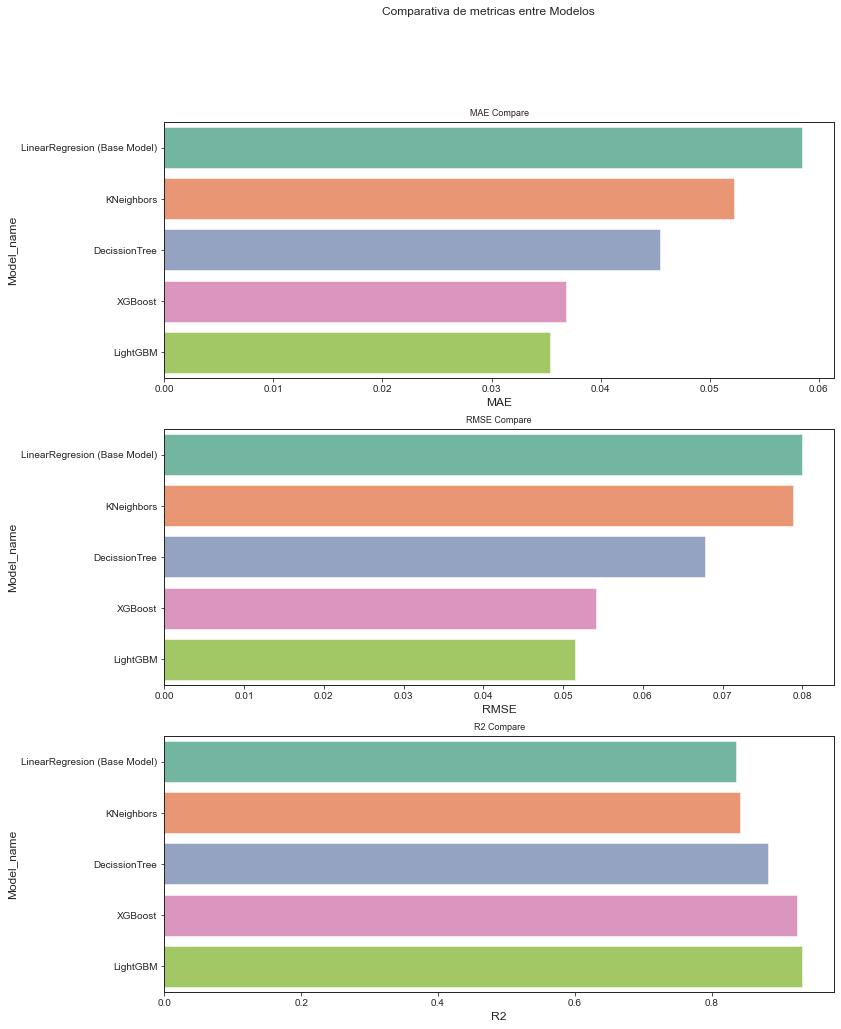

In [19]:
pd_ln=evaluation_function(y_test['x1_Renovable'],y_pred_ln,'LinearRegresion (Base Model)')
pd_kn=evaluation_function(y_test['x1_Renovable'],y_pred_KN,'KNeighbors')
pd_DT=evaluation_function(y_test['x1_Renovable'],y_pred_DT,'DecissionTree')
pd_XGB=evaluation_function(y_test['x1_Renovable'],y_pred_XGB,'XGBoost')
pd_LGBM=evaluation_function(y_test['x1_Renovable'],y_pred_LGBM,'LightGBM')

plot_metrics([pd_ln,pd_kn,pd_DT,pd_XGB,pd_LGBM])


## Real vs prediction comparation

At this point we plot the predicted data for each model fort test dataframe to compare it against the naive model (linear regressor) and the real values.

To check if there are overfitting we use 3 steps:
-First I check the R2 score
-Then we plot the result of the pedicted date vs the real date of each model
-And finally I check the scores of the best model with the whole data and with train data.

In [1]:
#Compare predicted data aganist real data for Peninsular system
plot_real_vs_pred('x0_peninsular',['x1_Renovable'],X_test,y_test, reg_ln, reg_KN, reg_DT, reg_XGB, reg_LGBM)

NameError: name 'plot_real_vs_pred' is not defined

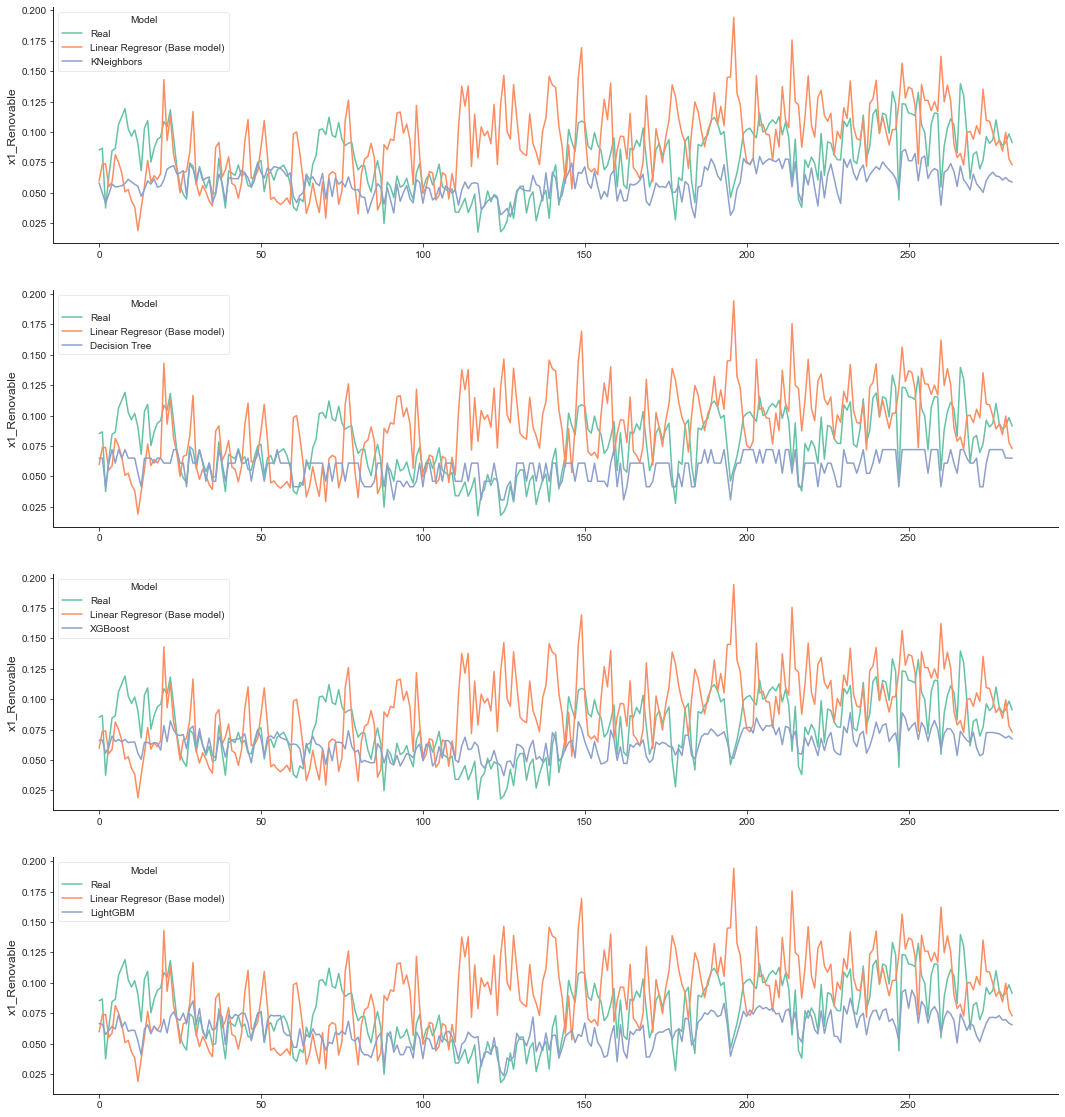

In [21]:
#Compare predicted data aganist real data for Balear system
plot_real_vs_pred('x0_baleares',['x1_Renovable'],X_test,y_test, reg_ln, reg_KN, reg_DT, reg_XGB, reg_LGBM)

# Pipeline

I make a pipeline with all the steps of this notebook and the best model to export and use in the frontend of the project with streamlit.

In [22]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

#Set the cols that are going to be used by the model
cols=['day','year','month','system','Holiday','weekday','tmin','presMin','prec','sol','velmedia','tmax','presMax','racha']

# Set the feature engineering steps (OneHotEncoder, date_transform and StandarScaler)
ct=ColumnTransformer(
    [
     ('enc',enc_system,['system']),
     ('date_transf',FunctionTransformer(date_transform),['day','year','month','weekday']),
     ('sc',StandardScaler(),['tmin','presMin','prec','sol','tmax','presMax','racha','velmedia'])
    ]
)

#Create the pipeline with the feature engineering steps and the best model
pipe_best_total=Pipeline(steps=[
                                ('ct',ct),
                                ('LGBM',LGBMRegressor(random_state=7))
                               ])

# Set the  parameters for the best model
params_LGBM={
    'LGBM__max_depth':[5],
    'LGBM__n_estimators':[99],
    'LGBM__learning_rate':[.08],
    'LGBM__subsample':[.5],
    'LGBM__colsample_bytree':[.9]
}

best_LGBM=GridSearchCV(pipe_best_total,param_grid=params_LGBM,
                      refit='neg_root_mean_squared_error',
                      scoring=scoring_metrics)

# fit the pipeline with the whole data
best_LGBM.fit(df_ree_weather[cols],df_ree_weather['x1_Renovable'])
print(best_LGBM.best_score_)

joblib.dump(best_LGBM, path_model+'best_model_renovable.sav')

-0.04504155785199436


['../models/best_model_renovable.sav']

## Overfitting

The score of the training version have to be better than the version with all the data.

In [23]:
print(best_LGBM.best_score_)
print(reg_LGBM.best_score_)

-0.04504155785199436
-0.04217056411641626
